In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier

In [4]:
resumedataset = pd.read_csv("C:\\Users\\ACER\\Desktop\\machine learning\\resume_scanning\\UpdatedResumeDataSet.csv",encoding = 'utf-8')
resumedataset["cleaned_resume"] = ''
resumedataset.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


displaying the discrete categories of the resume and number of resume belonging to each category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
ETL Developer                40
Data Science                 40
Operations Manager           40
Blockchain                   40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64


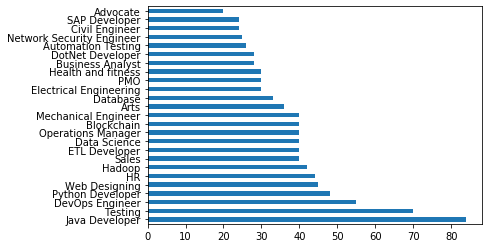

In [9]:
print("displaying the discrete categories of the resume and number of resume belonging to each category")
print(resumedataset["Category"].value_counts())
resumedataset["Category"].value_counts().plot(kind="barh")

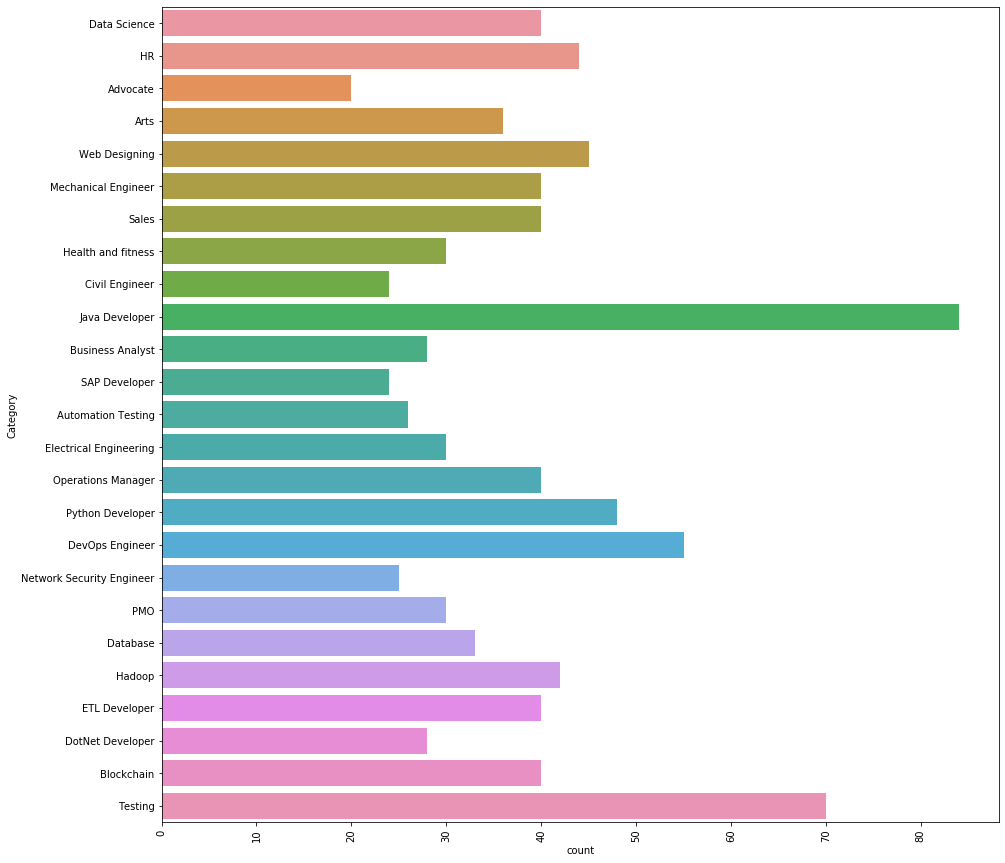

In [12]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation =90)
sns.countplot(y='Category',data = resumedataset)

In [52]:
import re
def cleanresume(resumetext):
    resumetext = re.sub('http\S+\s*','',resumetext)
    resumetext = re.sub('RT||cc','',resumetext)
    resumetext = re.sub('#\S+','',resumetext)
    resumetext = re.sub('@\S+','',resumetext)
    resumetext = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumetext)
    resumetext = re.sub(r'[^\x00-\x7f]',r' ', resumetext) 
    resumetext = re.sub('\s+',' ', resumetext)  # remove extra whitespace
    return resumetext

resumedataset["cleaned_resume"]= resumedataset.Resume.apply(lambda x: cleanresume(x))


In [53]:
print(resumedataset.cleaned_resume.head())

0    Skills Programming Languages Python pandas num...
1    Education Details May 2013 to May 2017 B E UIT...
2    Areas of Interest Deep Learning Control System...
3    Skills R Python SAP HANA Tableau SAP HANA SQL ...
4    Education Details MCA YMCAUST Faridabad Haryan...
Name: cleaned_resume, dtype: object


In [19]:
!pip install wordcloud

[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632), ('Technologies', 627)]


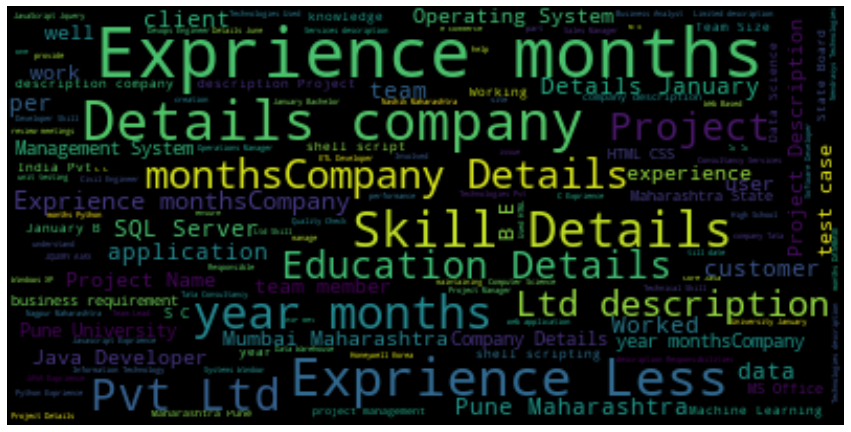

In [56]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

onesetofstopwords = set(stopwords.words('english')+['``',"''"])
totalwords = []
sentences = resumedataset["Resume"].values
cleanedsentences = ''

for i in range(resumedataset.shape[0]):
    cleanedtext = cleanresume(sentences[i])
    cleanedsentences += cleanedtext
    required_words = nltk.word_tokenize(cleanedtext)
    for word in required_words:
        if word not in onesetofstopwords and word not in string.punctuation:
            totalwords.append(word)
            
wordfreqdist = nltk.FreqDist(totalwords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedsentences)
plt.figure(figsize = (15,15))
plt.imshow(wc,interpolation = 'bilinear')
plt.axis("off")
plt.show()
            
    
                                        

In [73]:
x_training = resumedataset["cleaned_resume"].values
y_training = resumedataset["Category"].values
print("x_training shape:",x_training.shape)
print("y_training shape:",y_training.shape)


x_training shape: (962,)
y_training shape: (962,)


In [74]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

x_train,x_test,y_train,y_test = train_test_split(x_training,y_training,test_size =0.2,random_state= 42)

word_vectorizer = TfidfVectorizer()
word_vectorizer.fit(x_train)
x_train = word_vectorizer.transform(x_train)
x_test = word_vectorizer.transform(x_test)

categorical_vectorizer = LabelEncoder()
categorical_vectorizer.fit(y_train)
y_train = categorical_vectorizer.transform(y_train)
y_test =  categorical_vectorizer.transform(y_test)

print(x_train.shape)
print(y_train[15])

(769, 7516)
6


'clf = KneighborsClassifier()\nclf.fit(x_)'

In [76]:
clf = KNeighborsClassifier()
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))


Accuracy of KNeighbors Classifier on training set: 0.98
Accuracy of KNeighbors Classifier on test set: 0.98
